# 平移变换

## 加载图像

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

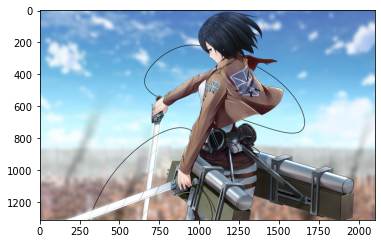

In [2]:
img = cv.imread(r'./images/target.jpg')
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

## 加载平移矩阵

In [3]:
matrix = np.float32([[1, 0, 100], [0, 1, 50]])


In [4]:
target_img = cv.warpAffine(img, matrix, (img.shape[1], img.shape[0]))

## 结果

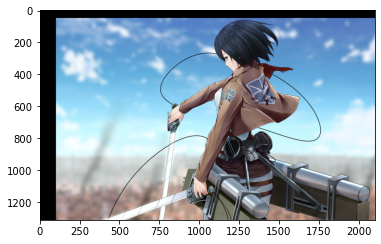

In [5]:
target_img = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img)
plt.show()

# 旋转

## 获取旋转矩阵

In [6]:
# 第一个参数为旋转中心 第二个为旋转角度 第三个为旋转后的缩放因子
m = cv.getRotationMatrix2D((img.shape[1] / 2,img.shape[0] / 2),45,0.6)

## 显示结果

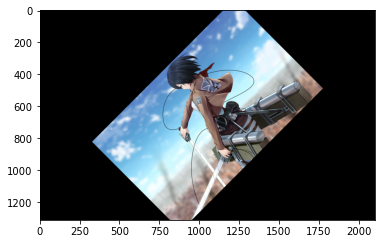

In [7]:
target_img = cv.warpAffine(img, m, (img.shape[1], img.shape[0]))
target_img = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img)
plt.show()

# 仿射变换

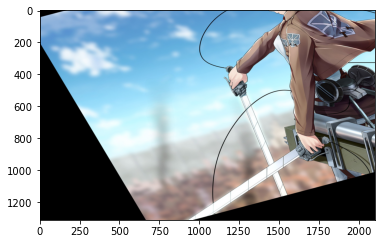

In [13]:
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[200,50],[100,250]])

M=cv.getAffineTransform(pts1,pts2)
rows, cols, _ = img.shape


dst=cv.warpAffine(img,M,(cols,rows))

plt.imshow(dst)
plt.show()